# Exercício 4

Exercícios referentes à **lista 3**: 1, 4, 7, 9, 11, 14, 19, 20, 27, 34, 35, 36.

Importando os pacotes necessários e os dados da tabela 2.1:

In [25]:
suppressMessages(install.packages("janitor"))

suppressPackageStartupMessages(library("dplyr"))
suppressPackageStartupMessages(library("scales"))
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("janitor"))
funcionarios <- read.csv("tabela_2_1.csv")

head(funcionarios)

,n,estado_civil,grau_instrucao,filhos,salario,idade_anos,idade_meses,regiao_procedencia
,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
1,1,solteiro,ensino fundamental,NA,4.00,26,3,interior
2,2,casado,ensino fundamental,1,4.56,32,10,capital
3,3,casado,ensino fundamental,2,5.25,36,5,capital
4,4,solteiro,ensino médio,NA,5.73,20,10,outra
5,5,solteiro,ensino fundamental,NA,6.26,40,7,outra
6,6,casado,ensino fundamental,0,6.66,28,0,interior


1) a)

In [17]:
funcionarios %>% tabyl(regiao_procedencia, grau_instrucao) %>% adorn_totals("row") %>% 
    adorn_totals("col") %>% adorn_percentages("all") %>% adorn_pct_formatting(digits = 2)

,regiao_procedencia,ensino fundamental,ensino médio,superior,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
1,capital,11.11%,13.89%,5.56%,30.56%
2,interior,8.33%,19.44%,5.56%,33.33%
3,outra,13.89%,16.67%,5.56%,36.11%
4,Total,33.33%,50.00%,16.67%,100.00%


b)

In [53]:
funcionarios %>% count(grau_instrucao) %>% mutate(proporcao = percent(n/sum(n))) %>% 
    filter(grau_instrucao == "ensino médio")

grau_instrucao,n,proporcao
<chr>,<int>,<chr>
ensino médio,18,50%


c)

In [54]:
funcionarios %>% count(grau_instrucao, regiao_procedencia) %>% mutate(proporcao = percent(n/sum(n))) %>% 
    filter(grau_instrucao == "ensino médio" & regiao_procedencia == "interior")

grau_instrucao,regiao_procedencia,n,proporcao
<chr>,<chr>,<int>,<chr>
ensino médio,interior,7,19.4%


d)

In [55]:
funcionarios %>% filter(regiao_procedencia == "interior") %>% count(grau_instrucao) %>% 
    mutate(proporcao = percent(n/sum(n))) %>% filter(grau_instrucao == "ensino médio")

grau_instrucao,n,proporcao
<chr>,<int>,<chr>
ensino médio,7,58.3%


4) a)

In [22]:
funcionarios %>% tabyl(regiao_procedencia, grau_instrucao) %>% adorn_totals("col") %>% 
    adorn_totals("row") %>% adorn_percentages("row") %>% adorn_pct_formatting(digits = 2)

,regiao_procedencia,ensino fundamental,ensino médio,superior,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
1,capital,36.36%,45.45%,18.18%,100.00%
2,interior,25.00%,58.33%,16.67%,100.00%
3,outra,38.46%,46.15%,15.38%,100.00%
4,Total,33.33%,50.00%,16.67%,100.00%


b) [fazer]

7)

In [96]:
n <- funcionarios %>% count(grau_instrucao, regiao_procedencia) %>% pull(n)
regiao_procedencia <- funcionarios %>% count(regiao_procedencia) %>% pull(n)
grau_instrucao <- funcionarios %>% count(grau_instrucao) %>% pull(n)

m <- matrix(1:(length(regiao_procedencia) * length(grau_instrucao)), nrow = length(regiao_procedencia))

for (i in 1:nrow(m)) {
    for (j in 1:ncol(m)) {
        m[i, j] <- regiao_procedencia[i] * grau_instrucao[j]/nrow(funcionarios)
    }
}

qui_quadrado <- sum((n - as.vector(m))^2/as.vector(m))
coeficiente_contigencia <- sqrt(qui_quadrado/(qui_quadrado + nrow(funcionarios)))

paste("X^2 =", qui_quadrado)
paste("C =", coeficiente_contigencia)

[1] "X^2 = 0.661421911421912"

[1] "C = 0.134318129887708"

14)

In [118]:
variancia <- function(x) {
    sum((x - mean(x))^2/length(x))
}

vars <- funcionarios %>% group_by(estado_civil) %>% summarise(n = n(), var = variancia(idade_anos))
var_soma <- sum(vars %>% summarise(v = var * n) %>% pull(v))/sum(vars %>% pull(n))

var <- variancia(funcionarios %>% pull(idade_anos))

grau_associacao <- 1 - var_soma/var

paste("R^2 =", grau_associacao)

[1] "R^2 = 0.00909520062942559"

27) a)

In [24]:
funcionarios %>% mutate(cat_salario = cut(salario, breaks = c(-Inf, 8, 16, Inf), 
    labels = c("0 até 8", "8 até 16", "16 até 24")), cat_idade = cut(idade_anos, 
    breaks = c(-Inf, 30, 40, Inf), labels = c("20 até 30", "30 até 40", "40 até 50"))) %>% 
    tabyl(cat_salario, cat_idade) %>% adorn_title

,cat_idade,,
<chr>,<chr>,<chr>,<chr>
cat_salario,20 até 30,30 até 40,40 até 50
0 até 8,4,4,2
8 até 16,6,11,3
16 até 24,0,3,3


35)

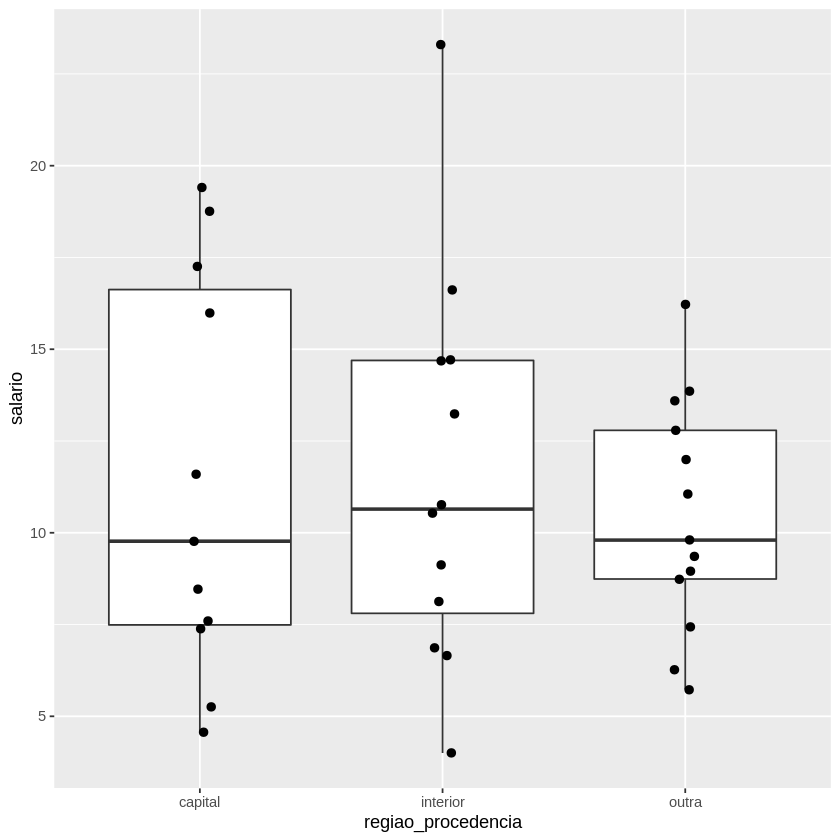

In [37]:
funcionarios %>% ggplot(aes(x = regiao_procedencia, y = salario)) + geom_boxplot() + 
    geom_jitter(width = 0.05, size = 2)

36)

In [38]:
variancia <- function(x) {
    sum((x - mean(x))^2/length(x))
}

# Idade

vars <- funcionarios %>% group_by(estado_civil) %>% summarise(n = n(), var = variancia(idade_anos))
var_soma <- sum(vars %>% summarise(v = var * n) %>% pull(v))/sum(vars %>% pull(n))

var <- variancia(funcionarios %>% pull(idade_anos))

grau_associacao <- 1 - var_soma/var

paste("(idade) R^2 =", grau_associacao)

# Salário

vars <- funcionarios %>% group_by(estado_civil) %>% summarise(n = n(), var = variancia(salario))
var_soma <- sum(vars %>% summarise(v = var * n) %>% pull(v))/sum(vars %>% pull(n))

var <- variancia(funcionarios %>% pull(salario))

grau_associacao <- 1 - var_soma/var

paste("(salário) R^2 =", grau_associacao)

[1] "(idade) R^2 = 0.00909520062942559"

[1] "(salário) R^2 = 0.0612504827954509"